In [ ]:
import pandas as pd
import numpy as np

import re

import geopandas as gpd

import matplotlib.pyplot as plt

from shapely.geometry import box, mapping, polygon, multipolygon, Point
from foursquare import fetch_venue_categories, generate_square_grid, search_city_venues, fetch_venue_likes
from geojson import Feature, FeatureCollection, dump

# Bangkok venues - Data Mining

### Table of Contents

1. [Load District Bounds](#district-bounds)

2. [Generate Bangkok city grid](#generate-grid)
    
3. [Fetch Bangkok food venues](#food-venues)

4. [Compute and save district area and density](#area-density)

### Inputs/Outputs
Required inputs:
- 'data/Bangkok_neighbourhoods.json' (from https://worldmap.harvard.edu/data/geonode:adm2_greaterBK_hD4)

Outputs:
- 'data/Bangkok_districts_grid.geojson'
- 'data/Bangkok_districts_food_venues.geojson'
- 'data/Bangkok_district_density.geojson'
- 'data/Bangkok_districts.shp'

## Load District Bounds
<a id='district-bounds'></a>

In [57]:
# District bounds sourced by https://worldmap.harvard.edu/data/geonode:adm2_greaterBK_hD4
districts_gdf = gpd.read_file('data/Bangkok_neighbourhoods.json')
# Preserve id for dissolve bounds operation below
districts_gdf = districts_gdf[['NAME_0', 'NAME_2', 'geometry']]
districts_gdf.columns = ['subject','district','geometry']
districts_gdf

,subject,district,geometry
0,Thailand,Ban Na,"MULTIPOLYGON (((101.06481 14.41179, 101.06536 ..."
1,Thailand,Ongkharak,"MULTIPOLYGON (((100.97552 14.23500, 100.97700 ..."
2,Thailand,Bang Len,"MULTIPOLYGON (((100.28336 14.14591, 100.28307 ..."
3,Thailand,Phuttha Mon Thon,"MULTIPOLYGON (((100.32971 13.80120, 100.33000 ..."
4,Thailand,Bang Su,"MULTIPOLYGON (((100.53735 13.83085, 100.53590 ..."
...,...,...,...
80,Thailand,Bang Bo,"MULTIPOLYGON (((100.93635 13.66819, 100.93792 ..."
81,Thailand,Phra Samut Jadee,"MULTIPOLYGON (((100.55722 13.61222, 100.55778 ..."
82,Thailand,Krathum Baen,"MULTIPOLYGON (((100.33558 13.72002, 100.33561 ..."
83,Thailand,Muang Samut Sakhon,"MULTIPOLYGON (((100.34015 13.64018, 100.34168 ..."


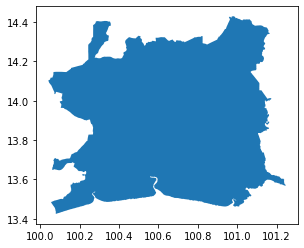

In [62]:
# Plot dissolved district bounds
bangkok_gdf = districts_gdf.dissolve(by='subject')
bangkok_gdf.plot()
plt.show()

## Generate Bangkok city grid
<a id='generate-grid'></a>

In [6]:
# Generate grid and save to file
grid = generate_square_grid(bangkok_gdf.geometry)

cfs = {'city_name': 'Bangkok'}

feature_list = [Feature(geometry=g) for g in grid]
feature_collection = FeatureCollection(feature_list) 

with open(f'data/{city_filename}_districts_grid.geojson', 'w') as f:
   dump(feature_collection, f)

print('Saved grid to file.')

In [3]:
# Read file just generated
bangkok_grid_gdf = gpd.read_file('data/Bangkok_districts_grid.geojson')
bangkok_grid_gdf

,geometry
0,"POLYGON ((100.05000 14.08481, 100.04946 14.085..."
1,"POLYGON ((100.04174 14.10000, 100.04095 14.101..."
2,"POLYGON ((100.10000 13.43166, 100.09972 13.431..."
3,"POLYGON ((100.07584 13.45000, 100.07525 13.452..."
4,"POLYGON ((100.09936 13.50000, 100.10000 13.500..."
...,...
390,"POLYGON ((101.15000 14.01456, 101.15008 14.014..."
391,"POLYGON ((101.15829 14.35000, 101.15827 14.349..."
392,"POLYGON ((101.15000 14.37050, 101.15047 14.369..."
393,"POLYGON ((101.23721 13.60000, 101.23727 13.599..."


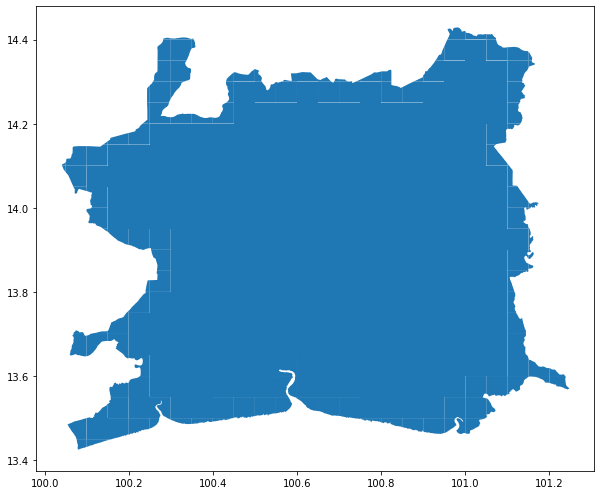

In [3]:
# Plot grid
bangkok_grid_gdf.plot(figsize=(10,10))
plt.show()

## Fetch Bangkok food venues
<a id='fetch-venues' />

In [ ]:
# Verbose output cleared. 
venues_list = search_city_venues('Bangkok', bangkok_grid_gdf)

In [5]:
# Dataframe Bangkok food venues
venues = pd.DataFrame(venues_list)
venues

,city,id,name,category,location
0,Bangkok,5d89ecb2ebc5f800083c9c72,วนิดาฟาร์ม ร้านอาหารทะเล ฟาร์มสเตย์ และบ่อตกปล...,Restaurant,POINT (100.080184 13.427331)
1,Bangkok,4f979611e4b0107577b7473d,น้ำดื่มไลออนคิงส์,Deli / Bodega,POINT (100.079842 13.426602)
2,Bangkok,4f019036c5126f14b907d325,ครัวแสงดาว,Seafood Restaurant,POINT (100.0920527777809 13.43015866582993)
3,Bangkok,4f2a1166e4b0d4e47d2b0990,อังเคิ้ลอาหารตามสั่ง ในปั้มน้ำมันบางจาก,Restaurant,POINT (100.0788796925729 13.44924218042575)
4,Bangkok,4ee0b7b80e01452f928d12ee,ลาบยโส ด่านช่างพระราม2 บางโทรัด สมุทรสาคร,Thai Restaurant,POINT (100.0793552010526 13.44985612255813)
...,...,...,...,...,...
56384,Bangkok,4e5a1b4c52b1b78b81a5ab1d,เรือนรับรองโรงเรียนเตรียม,Thai Restaurant,POINT (101.1233186995364 14.3084425079116)
56385,Bangkok,4feab941e4b07f87a595eb68,ร้านกาแฟพี่กุ้ง,Coffee Shop,POINT (101.119673 14.30635)
56386,Bangkok,4fbdc0d8e4b06a0de5ba961b,ก๋วยเตี๋ยวห้อยขา @ รร.เตรียมทหาร,Noodle House,POINT (101.1201126711912 14.30624925891529)
56387,Bangkok,5683b4e2498e95633f18c3bf,Wine I Love You Sweet Cafe,Donut Shop,POINT (101.116067 14.309938)


In [26]:
# Show common Venue types
venues.category.value_counts(dropna=False)[0:20]

Thai Restaurant         9451
Noodle House            5388
Coffee Shop             5202
Asian Restaurant        3886
Café                    3343
Restaurant              3323
Food Truck              2524
Diner                   1784
Dessert Shop            1183
Bakery                  1169
Steakhouse              1163
Japanese Restaurant     1118
Chinese Restaurant      1026
Fast Food Restaurant    1023
Seafood Restaurant       982
BBQ Joint                950
Food Court               858
Food                     727
Som Tum Restaurant       661
Ice Cream Shop           542
Name: category, dtype: int64

In [11]:
# GeoDataFrame venues
venues_gdf = gpd.GeoDataFrame(venues)
venues_gdf

,city,id,name,category,geometry
0,Bangkok,5d89ecb2ebc5f800083c9c72,วนิดาฟาร์ม ร้านอาหารทะเล ฟาร์มสเตย์ และบ่อตกปล...,Restaurant,POINT (100.08018 13.42733)
1,Bangkok,4f979611e4b0107577b7473d,น้ำดื่มไลออนคิงส์,Deli / Bodega,POINT (100.07984 13.42660)
2,Bangkok,4f019036c5126f14b907d325,ครัวแสงดาว,Seafood Restaurant,POINT (100.09205 13.43016)
3,Bangkok,4f2a1166e4b0d4e47d2b0990,อังเคิ้ลอาหารตามสั่ง ในปั้มน้ำมันบางจาก,Restaurant,POINT (100.07888 13.44924)
4,Bangkok,4ee0b7b80e01452f928d12ee,ลาบยโส ด่านช่างพระราม2 บางโทรัด สมุทรสาคร,Thai Restaurant,POINT (100.07936 13.44986)
...,...,...,...,...,...
56384,Bangkok,4e5a1b4c52b1b78b81a5ab1d,เรือนรับรองโรงเรียนเตรียม,Thai Restaurant,POINT (101.12332 14.30844)
56385,Bangkok,4feab941e4b07f87a595eb68,ร้านกาแฟพี่กุ้ง,Coffee Shop,POINT (101.11967 14.30635)
56386,Bangkok,4fbdc0d8e4b06a0de5ba961b,ก๋วยเตี๋ยวห้อยขา @ รร.เตรียมทหาร,Noodle House,POINT (101.12011 14.30625)
56387,Bangkok,5683b4e2498e95633f18c3bf,Wine I Love You Sweet Cafe,Donut Shop,POINT (101.11607 14.30994)


In [21]:
# Save to file
venues_gdf.to_file('data/Bangkok_districts_food_venues.geojson', driver='GeoJSON')

## Compute and save district area and density
<a id='area-density'></a>

In [38]:
# Perform spatial join on venues_gdf and districts
venue_density_df =\
    gpd.sjoin(venues_gdf,districts_gdf[['district', 'geometry']],how='right',op='within')\
        .groupby('district')\
        .agg({'geometry': 'first', 'id': 'count'})

venue_density_df =\
    gpd.GeoDataFrame(venue_density_df, crs={'init': 'epsg:4326'})

venue_density_df['area_sqkm'] =\
    venue_density_df.apply(lambda n: n.geometry.area/10**6, axis=1)
venue_density_df['density'] =\
    venue_density_df['id']/venue_density_df['area_sqkm']

venue_density_df.reset_index(inplace=True)
venue_density_df

,district,geometry,id,area_sqkm,density
0,Ban Na,"MULTIPOLYGON (((101.06481 14.41179, 101.06536 ...",299,2.951617e-08,1.013004e+10
1,Ban Pho,"MULTIPOLYGON (((100.96163 13.70401, 100.96242 ...",282,1.733921e-08,1.626371e+10
2,Bang Bo,"MULTIPOLYGON (((100.93635 13.66819, 100.93792 ...",307,1.827028e-08,1.680324e+10
3,Bang Bon,"MULTIPOLYGON (((100.43022 13.67181, 100.42820 ...",104,3.017369e-09,3.446712e+10
4,Bang Bua Thong,"MULTIPOLYGON (((100.38375 13.98669, 100.38609 ...",1094,1.106805e-08,9.884306e+10
...,...,...,...,...,...
80,Wang Noi,"MULTIPOLYGON (((100.82285 14.32829, 100.82439 ...",313,1.942248e-08,1.611535e+10
81,Wang Thonglang,"MULTIPOLYGON (((100.58796 13.80530, 100.58826 ...",604,1.434320e-09,4.211054e+11
82,Wattana,"MULTIPOLYGON (((100.55692 13.75175, 100.55806 ...",1704,1.073738e-09,1.586980e+12
83,Wihan Daeng,"MULTIPOLYGON (((100.99131 14.42083, 100.99177 ...",105,1.910760e-08,5.495196e+09


In [46]:
# Save to file as geojson
venue_density_df.to_file('data/Bangkok_district_density.geojson', driver="GeoJSON")

In [75]:
# Save to file as shp
all_venues = venue_density_df[['district','geometry']].reset_index(drop=True)
all_venues.to_file('data/Bangkok_districts.shp')